In [0]:
import warnings
warnings.filterwarnings("ignore") 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
##Normal Equation

df = pd.read_csv('dataset.csv')
# print(df.head())
X = df.iloc[:,2:]
Y = df.iloc[:,1]

for i in range(X.shape[1]):
  if(X.iloc[1,i]=="yes"or X.iloc[1,i]=="no"):
    X.iloc[:,i]=(X.iloc[:,i]=="yes")      #converts yes ,no to true,false

X=X*1                                     #converts true , false to 1,0.
X
trainLen=int(0.75*df.shape[0])
# print(trainLen)
trainX=X.iloc[:trainLen,:]
trainY=df.iloc[:trainLen,1]
testX=X.iloc[trainLen:,:]
testY=df.iloc[trainLen:,1]

XTrans=np.transpose(trainX)
XXTrans=XTrans.dot(trainX)
XXTransInv=np.linalg.inv(XXTrans)
XXTransInv.shape
XTransY=XTrans.dot(trainY)
theta=XXTransInv.dot(XTransY)
theta.shape


#Accuracy

predictY=testX.dot(theta)
predictY
error=0
for i in range(trainLen,df.shape[0]):
  # print(predictY[i],testY[i])
  error+=(predictY[i]-testY[i])/testY[i]*100

print("Co-efficient matrix after applying Normal Equation : ")
print(theta.T)
print("")
print("Percentage Error from Normal Equation = "+str(error/testY.shape[0]))


Co-efficient matrix after applying Normal Equation : 
[3.62636621e+00 1.39376008e+03 1.27236059e+04 6.60997094e+03
 5.16405029e+03 4.49862938e+03 5.17738242e+03 1.44745763e+04
 1.21882815e+04 4.40594192e+03 1.38408223e+04]

Percentage Error from Normal Equation = 8.060706597718553


Percentage error =16.301718423323504

 Optimal Theta = [[ 8013.53768373  1292.3090187   6478.1755138   5773.55140823
   1947.89829898  1695.44254311  2519.87502682  3012.04465653
   5653.88416618  3730.88025761  5729.37863097 68902.13754933]]



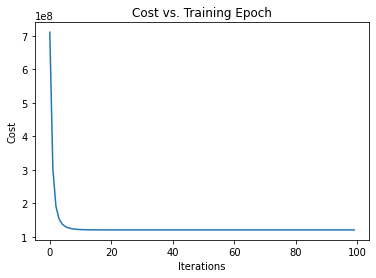

In [37]:
##gradient descent
df = pd.read_csv('dataset.csv')
X = df.iloc[:,2:]
Y = df.iloc[:,1]

for i in range(X.shape[1]):
  if(X.iloc[1,i]=="yes"or X.iloc[1,i]=="no"):
    X.iloc[:,i]=(X.iloc[:,i]=="yes")      #converts yes ,no to true,false

X=X*1                                     #converts true , false to 1,0.
X

X = (X - X.mean())/X.std()
Y = (Y - Y.mean())/Y.std()


trainLen=int(0.75*df.shape[0])

trainX=X.iloc[:trainLen,:]
trainY=df.iloc[:trainLen,1:2]

testX=X.iloc[trainLen:,:]
testY=df.iloc[trainLen:,1:2]

m = trainX.shape[0]
n = trainX.shape[1]
ones = [1 for i in range(m)]
# trainX = np.hstack((t,trainX))    #appending 1's at in the last col

trainX['ones']=ones
ones = [1 for i in range(137)]
testX['ones']=ones

trainX=np.asarray(trainX)
trainY=np.asarray(trainY)
testX=np.asarray(testX)
testY=np.asarray(testY)
costList=[]
iterList=[]
iters=100

minCost=1e19
alpha = 0.5

minTheta= np.random.rand(1,trainX.shape[1])
theta= np.random.rand(1,trainX.shape[1])

# iterList.append(iters)
for i in range(iters):
  theta = theta - (alpha/len(trainX)) * np.sum(trainX * (trainX @ theta.T - trainY), axis=0)
  J=np.power(((trainX.dot(theta.T))-trainY),2)
  cost=np.sum(J)/(2 * len(trainX))
  costList.append(cost)
  # cost=np.sum(abs(trainX.dot(theta.T)-trainY))/2*len(trainX)
  # print(cost)
  if(cost<minCost):
    # print("ansc")
    minCost=cost
    minTheta=theta

# print(minTheta.shape,testX.shape)
Ypred = testX.dot(minTheta.T)
# print(Ypred)
error = 0
for i in range(len(Ypred)):
  # print(testY[i],Ypred[i])
  error += abs(testY[i] - Ypred[i]) / testY[i]
error /= len(testY)
print("Percentage error =" +str(error[0]*100))
print("")
print(" Optimal Theta = "+str(minTheta))
print("")
#   J=np.power(((trainX.dot(minTheta.T))-trainY),2)
#   costList.append(np.sum(J)/(2 * len(trainX)))
    
plt.xlabel('Iterations') 
plt.ylabel('Cost')  
plt.title('Cost vs. Training Epoch')
plt.plot(np.arange(iters),costList)


      lotsize  bedrooms   bathrms   stories  ...     airco  garagepl  prefarea  ones
0    0.322732  0.047192 -0.568973  0.221501  ... -0.680410  0.357239 -0.552865     1
1   -0.530526 -1.308947 -0.568973 -0.930304  ... -0.680410 -0.803788 -0.552865     1
2   -0.964074  0.047192 -0.568973 -0.930304  ... -0.680410 -0.803788 -0.552865     1
3    0.691709  0.047192 -0.568973  0.221501  ... -0.680410 -0.803788 -0.552865     1
4    0.557955 -1.308947 -0.568973 -0.930304  ... -0.680410 -0.803788 -0.552865     1
..        ...       ...       ...       ...  ...       ...       ...       ...   ...
541 -0.161550  0.047192  1.422433  2.525111  ...  1.467011 -0.803788 -0.552865     1
542  0.391915  0.047192  1.422433  2.525111  ...  1.467011 -0.803788 -0.552865     1
543  0.391915  0.047192  1.422433  2.525111  ...  1.467011  0.357239 -0.552865     1
544  0.391915  0.047192  1.422433  0.221501  ...  1.467011  0.357239 -0.552865     1
545  0.391915  0.047192 -0.568973  0.221501  ...  1.467011  0.357

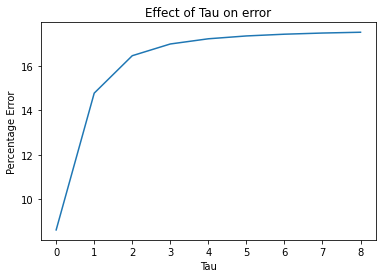

In [34]:
##LWR
import matplotlib.pyplot as plt
def findTheta(X,Y,tau,testXInd):
  func=np.exp(np.sum((X-X[testXInd])**2,axis=1)/(-2*tau**2))
  # print(func)
  W = func * np.identity(X.shape[0])
  mat=X.T.dot(W).dot(X)
  theta = np.linalg.inv(mat)@X.T@W@Y
  return theta

df = pd.read_csv('dataset.csv')
X = df.iloc[:,2:]
Y = df.iloc[:,1:2]

for i in range(X.shape[1]):
  if(X.iloc[1,i]=="yes"or X.iloc[1,i]=="no"):
    X.iloc[:,i]=(X.iloc[:,i]=="yes")      #converts yes ,no to true,false

X=X*1                                     #converts true , false to 1,0.
ones = [1 for i in range(len(X))]
# trainX = np.hstack((t,trainX))    #appending 1's at in the last col

mean = Y.mean()
stddev = Y.std()
X = (X - X.mean())/X.std()
Y = (Y - Y.mean())/Y.std()
X['ones']=ones
print(X)
X=np.asarray(X)
Y=np.asarray(Y)

error=0
errorList=[]
for tau in range(1,10):
  error=0
  for i in range(0,len(X)):
    theta=findTheta(X,Y,tau,i)
    # print(theta)
    predY=X[i]@theta
    actualY=Y[i][0]
    predY[0]=predY[0]*stddev+mean
    actualY=actualY*stddev+mean
    # print(actualY,predY)
    
    error+=abs(predY[0]-actualY)/actualY
#   print(actualY,predY,error)
# print(error)

  # print(error/len(X)*100)
  errorList.append(error/len(X)*100)

plt.xlabel('Tau')
plt.ylabel('Percentage Error')  
plt.title('Effect of Tau on error') 
plt.plot(range(9),errorList)
